In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set_theme()

In [2]:
def get_logarithmic_returns(tickers: list, start: str, end: str)-> pd.DataFrame:
    data = yf.download(tickers=tickers, start=start, end=end)
    data = data["Adj Close"]
    data = pd.DataFrame(np.diff(np.log(data[1:]), axis=0) * 100, columns=data.columns)
    data = data.dropna(axis=0)
    return data

In [3]:
log_returns = get_logarithmic_returns(tickers=["AAPL", "GOOG", "BAS.DE", "BMW.DE", "RWE.DE", "DBK.DE"], start = "2010-01-01", end = "2018-12-31")

[*********************100%%**********************]  6 of 6 completed


Efficient Frontier

In [4]:
mu = np.mean(log_returns, axis=0).to_numpy()

In [5]:
mu

array([ 0.04970847,  0.00249982, -0.00303979, -0.0939    ,  0.04243715,
       -0.02163403])

In [6]:
cov = np.cov(log_returns, rowvar=False)

In [7]:
C1 = np.linalg.inv(cov)

In [8]:
a = np.matmul(np.matmul(mu, C1), mu)

In [9]:
b = np.matmul(np.ones((1, 6)) ,np.matmul(C1, mu))[0]

In [10]:
d = np.matmul(np.ones((1, 6)), np.matmul(C1, np.ones((6,1))))

In [11]:
wvarmin = (1/d) * np.matmul(C1, np.ones((6,1)))

In [12]:
sigmamin = 1/np.sqrt(d)[0][0]

In [13]:
mumin = b/d

In [14]:
sigma_p = np.arange(sigmamin, 5, 0.0001)

In [15]:
sigma_p.shape

(39429,)

In [16]:
upper_optimal_PF = np.empty(shape=(sigma_p.shape[0],2))
upper_optimal_PF[:,0] = sigma_p

In [17]:
for i in range(0,upper_optimal_PF.shape[0]):
    upper_optimal_PF[i,1] = mumin + np.sqrt((np.square(upper_optimal_PF[i,0]) - np.square(sigmamin)) * (a - np.square(mumin)/np.square(sigmamin)))

C:\Users\morit\AppData\Local\Temp\ipykernel_4604\2263337394.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  upper_optimal_PF[i,1] = mumin + np.sqrt((np.square(upper_optimal_PF[i,0]) - np.square(sigmamin)) * (a - np.square(mumin)/np.square(sigmamin)))


In [18]:
lower_optimal_PF = np.empty(shape=(sigma_p.shape[0],2))
lower_optimal_PF[:,0] = sigma_p
for i in range(0,lower_optimal_PF.shape[0]):
    lower_optimal_PF[i,1] = mumin - np.sqrt((np.square(lower_optimal_PF[i,0]) - np.square(sigmamin)) * (a - np.square(mumin)/np.square(sigmamin)))

C:\Users\morit\AppData\Local\Temp\ipykernel_4604\2517006218.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lower_optimal_PF[i,1] = mumin - np.sqrt((np.square(lower_optimal_PF[i,0]) - np.square(sigmamin)) * (a - np.square(mumin)/np.square(sigmamin)))


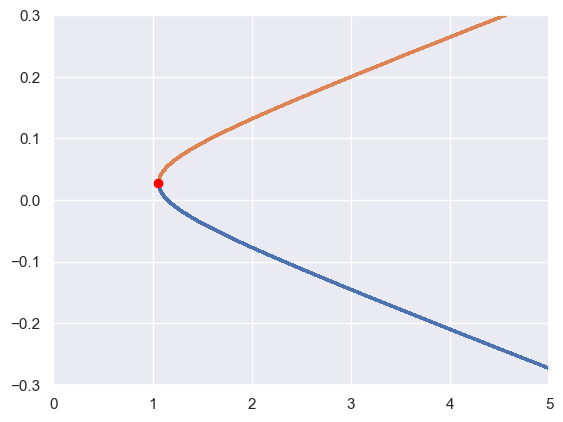

In [24]:
plt.scatter(x = lower_optimal_PF[:,0], y = lower_optimal_PF[:,1], s = 1)
plt.xlim(0,5)
plt.ylim(-0.3,0.3)
plt.scatter(x = upper_optimal_PF[:,0], y = upper_optimal_PF[:,1], s = 1)
plt.scatter(sigmamin, mumin, color = 'red');

In [33]:
mumin[0][0]

np.float64(0.0281373530619483)

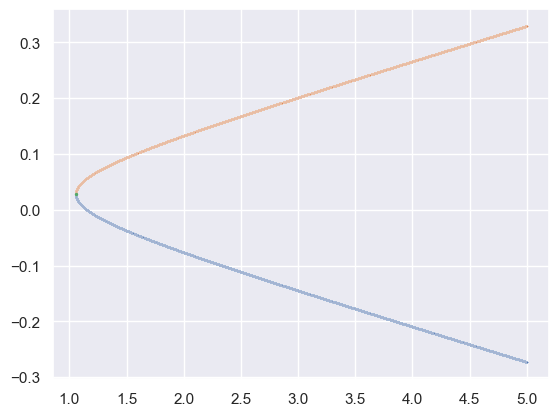

In [36]:
sns.scatterplot(x = lower_optimal_PF[:,0], y = lower_optimal_PF[:,1], s = 1)
sns.scatterplot(x = upper_optimal_PF[:,0], y = upper_optimal_PF[:,1], s = 1)
plt.scatter(x = sigmamin, y = mumin[0][0], s=2)

Simulate random Portfolio

In [4]:
# allow negative pf weights?

In [93]:
cov = np.cov(log_returns, rowvar=False)
returns = np.random.multivariate_normal(mu, cov, size=1000)


In [94]:
# create random portfolio weights
PF_weights = np.random.rand(500,6)
PF_weights = PF_weights/PF_weights.sum(axis=1, keepdims=True)

In [95]:
# calculate PF Returns

In [96]:
temp_returns = PF_weights[0] * returns

In [97]:
temp_returns_overall = temp_returns.sum(axis=1)

In [98]:
temp_returns_overall

array([-1.94201966e+00, -2.10698910e+00, -3.75175004e+00, -8.05914936e-01,
       -1.31429697e+00,  2.27128642e-01, -1.52229874e+00,  1.05536930e+00,
       -2.43939036e-01, -1.65765401e-01,  3.58134692e+00, -1.36684599e+00,
        5.24999221e-01,  1.95168087e+00, -1.12525798e+00, -2.28588547e-01,
       -1.14240490e+00,  1.75703683e-01,  9.37687861e-01, -1.42932438e+00,
        1.48943467e+00, -1.81797330e+00,  8.86582731e-01, -1.26284301e+00,
        8.59812855e-01,  1.10004155e+00,  1.83121272e+00, -1.95707697e-01,
       -1.26590899e+00, -2.85909970e+00, -3.35757718e+00,  1.84005557e+00,
       -2.69753232e+00,  6.58669090e-01,  1.81916914e-01, -9.51913401e-01,
        1.90769471e+00,  3.16981455e-01, -4.84007372e-01, -1.68499128e+00,
       -1.07530171e+00, -2.61821455e+00, -1.32572535e+00, -8.66397684e-01,
       -1.11664483e+00,  6.93506780e-01,  2.03422945e+00,  6.42822690e-02,
        6.48483069e-01, -3.06415493e+00,  1.78266543e+00, -1.34652782e+00,
       -1.27888976e+00,  

In [99]:
temp_returns_overall.std()

np.float64(1.5379779738979464)

In [100]:
def calculate_pf_returns(PF_weight, returns):
    temp_returns_overall2 = (PF_weight * returns).sum(axis=1)
    temp_mean = temp_returns_overall2.mean()
    temp_std = temp_returns_overall2.std()
    return temp_mean, temp_std


In [101]:
calculate_pf_returns(PF_weight=PF_weights[0], returns=returns)

(np.float64(-0.10572034836116644), np.float64(1.5379779738979464))

In [102]:
simulated_mu_sigma = np.empty((500,2))
for i in range(0, len(PF_weights)):
    simulated_mu_sigma[i] = calculate_pf_returns(PF_weight=PF_weights[i], returns=returns)

In [103]:
simulated_mu_sigma

array([[-0.10572035,  1.53797797],
       [-0.03791253,  1.37150231],
       [-0.03304625,  1.224256  ],
       [-0.07637449,  1.44339716],
       [-0.03080228,  1.13840468],
       [-0.03344057,  1.12734378],
       [-0.02635283,  1.26971623],
       [-0.02525831,  1.11525126],
       [-0.05436837,  1.20919665],
       [-0.04170846,  1.19985546],
       [-0.03248668,  1.15643963],
       [-0.05911979,  1.25513016],
       [-0.02556341,  1.21003291],
       [-0.03833497,  1.20486249],
       [-0.03432444,  1.14101986],
       [-0.0325217 ,  1.16811149],
       [-0.05290808,  1.30700004],
       [-0.07487169,  1.41654243],
       [-0.01195416,  1.09847197],
       [-0.06305686,  1.35665129],
       [-0.04998661,  1.45431463],
       [-0.06994566,  1.30804034],
       [-0.03531816,  1.29830724],
       [-0.02924668,  1.15584172],
       [-0.06064103,  1.32446118],
       [-0.04526601,  1.2032401 ],
       [-0.02910035,  1.17172323],
       [-0.01283607,  1.11176846],
       [-0.04912123,

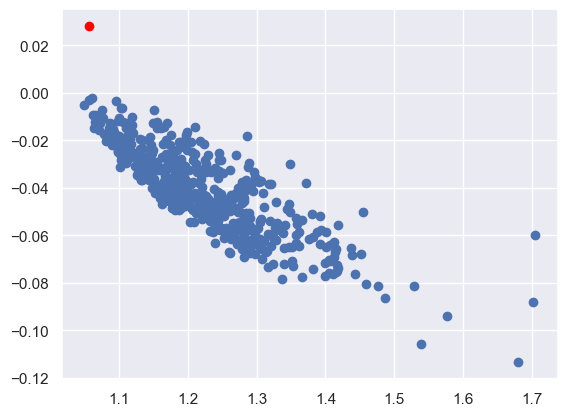

In [188]:
plt.scatter(x = simulated_mu_sigma[:,1], y = simulated_mu_sigma[:,0])
plt.scatter(sigmamin, mumin, color = 'red')
#plt.scatter(x = lower_optimal_PF[:,0], y = lower_optimal_PF[:,1])

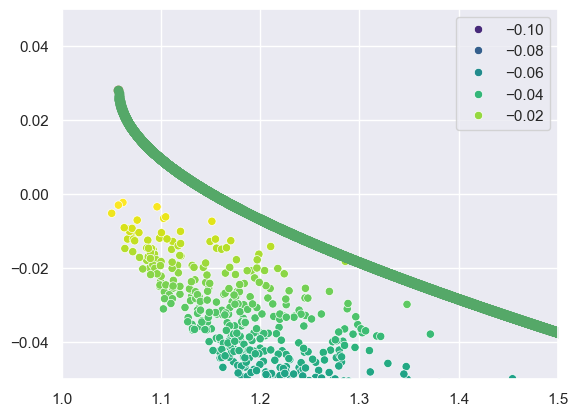

In [186]:
sns.scatterplot(x = simulated_mu_sigma[:,1], y = simulated_mu_sigma[:,0], palette='viridis', hue=simulated_mu_sigma[:,0])
plt.xlim(1,1.5)
plt.ylim(-0.05, 0.05)
plt.scatter(sigmamin, mumin)
plt.scatter(x = lower_optimal_PF[:,0], y = lower_optimal_PF[:,1])

In [106]:
mumin

array([[0.02813735]])

In [107]:
sigmamin

array([[1.0571092]])